In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import requests
import sys

In [9]:
sys.path.append('/Users/ugxnbmikhs/opt/miniconda3/envs/py39/lib/python3.9/site-packages')



In [10]:
import lxml

Price_ch 309.08226343319063
Price_sv 362.60914227015917
Price_ru 145.51380926049885


,Product,Price_ru,Price_sv,Price_ch
0,"Milk (regular), (0.25 liter)",15.62,25.1370,31.9644
1,Loaf of Fresh White Bread (125.00 g),9.24,49.0392,57.3720
2,"Rice (white), (0.10 kg)",7.29,22.4910,22.9488
3,Eggs (regular) (2.40),16.76,51.5088,91.7952
4,Local Cheese (0.10 kg),54.78,74.7054,190.9668
5,Chicken Fillets (0.15 kg),39.42,115.1010,313.9068
6,Beef Round (0.15 kg) (or Equivalent Back Leg R...,71.51,214.8552,615.5196
7,Apples (0.30 kg),30.47,71.0010,95.0736
8,Banana (0.25 kg),17.62,49.0392,56.5524
9,Oranges (0.30 kg),29.15,67.4730,81.1404


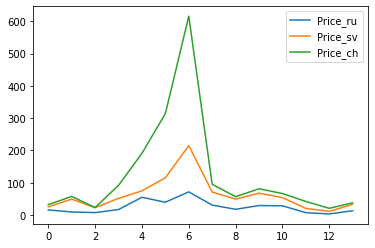

In [166]:
#Reading the data from files
#Switzerland
df1 = pd.read_csv("CH.csv", sep="\t", dtype={'Product': str, 'Price': str})
df1['Price'] = df1["Price"].str.replace(' Fr.', '')
df1['Price'] = df1['Price'].astype(float)
df1["Price"] = df1["Price"]*81.96

#Russia
df2 = pd.read_csv("RU.csv", sep="\t", dtype={'Product': str, 'Price': str})
df2['Price'] = df2["Price"].str.replace(' руб', '')
df2['Price'] = df2['Price'].astype(float)

#Sweden
df3 = pd.read_csv("SW.csv", sep="\t", dtype={'Product': str, 'Price': str})
df3['Price'] = df3["Price"].str.replace(' kr', '')
df3['Price'] = df3['Price'].astype(float)
df3["Price"] = df3["Price"]*8.82

prices_df = df1.join(df2, lsuffix="_ch", rsuffix="_ru").join(df3, rsuffix="sv").drop(["Product_ru","Product_ch"], axis=1)
prices_df = prices_df.rename(columns={"Price": "Price_sv"})
prices_df = prices_df[["Product", "Price_ru", "Price_sv", "Price_ch"]]
prices_df.plot()

salaries = {"Price_ch":6500*81.96, "Price_sv": 35300*8.82, "Price_ru": 50000}

sums = dict(prices_df.sum())

#divide salary with the cost of products
for n, s in salaries.items():
    print(n, s/sums[n])
    
prices_df

In [105]:
index_df = pd.read_csv("index.csv", sep="\t")

In [120]:
index_df["Ratio"] = index_df["Cost of Living Plus Rent Index"]/index_df["Local Purchasing Power Index"]

In [127]:
moscow = index_df[index_df["City"]=="Moscow, Russia"]
bern = index_df[index_df["City"]=="Bern, Switzerland"]
stockholm = index_df[index_df["City"]=="Stockholm, Sweden"]
krasnodar = index_df[index_df["City"]=="Krasnodar, Russia"]


In [161]:
my_cities = pd.concat([moscow, bern, stockholm, krasnodar])
my_cities[["City","Country"]] = my_cities["City"].str.split(",", expand=True).rename(columns={0: "City", 1:"Country"})
my_cities = my_cities.drop("Rank", axis=1)
my_cities = my_cities.set_index(["City"])


<AxesSubplot:xlabel='City'>

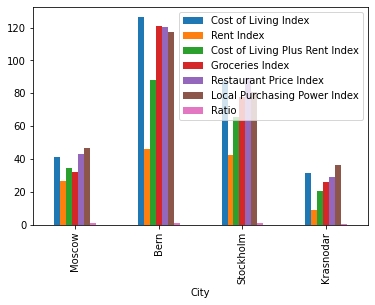

In [162]:
my_cities.plot.bar()


<AxesSubplot:xlabel='City'>

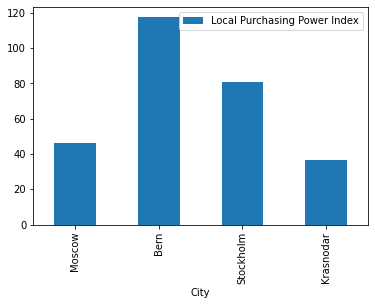

In [165]:
my_cities[["Local Purchasing Power Index"]].plot.bar()

In [11]:
from html_table_parser.parser import HTMLTableParser

In [90]:

url = "https://www.coop.ch/de/lebensmittel/fleisch-fisch/charcuterie-wurstwaren/wuerste/rauchwuerste-saucisson/c/m_2367"
r = requests.get(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')

In [93]:
myitems = soup.find_all("li", {"class": "list-page__item"})
prices = []
length = 0
for item in myitems:
    p = item.find_all("div", class_="productTile__price-value-per-weight-text inline")
    if p:
        if p[0].text.strip():
            
            pr, w = p[0].text.split("/")
            prices.append(float(pr)/str_to_weight(w))
            print(pr,w)
        
        
        
    
print(sum(prices)/len(prices))
print(len(prices))

       1.77 100g
       2.19 100g
       3.72 100g
       2.04 100g
       4.66 100g
       2.40 100g
       2.65 100g
       2.60 100g
       1.97 100g
       3.64 100g
       4.38 100g
       3.68 100g
       3.17 100g
       3.25 100g
       3.98 100g
       3.70 100g
       3.70 100g
       4.43 100g
       3.98 100g
32.584210526315786
19


In [54]:
float(mydivs[0].find_all("p", class_="productTile__price-value-lead-price")[0].text.strip())

4.95

In [135]:
import re
def str_to_weight(s):
    m = re.match(r"(\d*)(\w+)", s)
    if m:
        w = float(m.group(1)) if m.group(1) else 1.0
        e = m.group(2)
        if e == 'g' or e == 'г':
            return 0.001 * w
        elif e == 'kg' or e == 'кг':
            return 1 * w
    return None
    

In [74]:
s = "100g"

In [77]:
m = re.match(r"(\d+)(\w+)", s)

In [82]:
m.group(2)

'g'

In [138]:
url = "https://www.vprok.ru/catalog/1390/kolbasy-vetchina/tip-obrabotki-kolb/vareno-kopchenaya"
r = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')

prices = []
myitems = soup.find_all("li", {"class": "js-catalog-product _additionals xf-catalog__item"})
for item in myitems:
    divs = item.find_all("div", class_="xf-price xf-product-cost__current js-product__cost")
    if divs:
    
        if divs[0].attrs["data-type"] == "шт":
            titles = item.find_all("a", class_ = "xf-product-title__link")
            if (titles):
                title = titles[0].attrs["title"]
                m = re.match(r".* (\d+)(г)", title)
                if m:
                    #print(divs[0].attrs["data-cost"])
                    a = (float(m.group(1))*1000)/float(divs[0].attrs["data-cost"])
                    prices.append(a)
                    
                    
        else:
            mult = str_to_weight(divs[0].attrs["data-type"])
            if "data-cost" in divs[0].attrs:
                a = float(divs[0].attrs["data-cost"])/mult
                prices.append(a)
            
            
            
print(prices)
print(sum(prices)/len(prices))
            

            
            
        




[904.8999999999999, 945.829750644884, 918.9, 812.2534230679972, 1265.8227848101264, 1003.2457952198289, 1019.0, 1441.0, 962.3204120357822, 1786.6258295048494, 1312.0131201312013, 1904.0, 2012.6509488211616, 1197.6047904191619, 971.1880867594691, 1307.0152040544147, 756.9, 1788.7087758524315, 974.3423189347192, 885.2168781351431, 868.6496446433273, 2122.4984839296544, 1279.5905310300705, 904.8999999999999]
1222.7156990830929


In [96]:
r.content

b'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body bgcolor="white">\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx/1.14.1</center>\r\n</body>\r\n</html>\r\n'

In [ ]:
productcard-container

In [160]:
url = "https://www.citygross.se/matvaror/chark/rimmat-och-rokt"
r = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')

prices = []
myitems = soup.find_all("a", {"class": "productcard-container"})

for item in myitems:
    try:
        
        value = item.find_all("div", {"class": "value__integer-wrapper"})
        price = float(value[0].find_all("span", class_="integer")[0].text)

        fraction = item.find_all("div", {"class": "value__fraction-unit-wrapper"})
        fraction = float(fraction[0].find_all("span", class_="fractions")[0].text)


        details = item.find_all("div", class_="details")
        txt = details[0].find_all("h3")[0].text
        mult = str_to_weight(txt.split(", ")[1])
        prices.append((price + fraction)/mult)
    except:
        continue
    

print(prices)
print(sum(prices)/len(prices))
            
    



[204.76190476190476, 488.0, 314.2857142857143, 488.0, 352.0, 298.0, 449.99999999999994, 326.1904761904762, 764.2857142857142, 990.9090909090909, 317.77777777777777, 785.7142857142857, 650.0, 283.33333333333337, 655.5555555555555]
491.25425685425677


In [2]:
s = "https://produkte.migros.ch/sortiment/supermarkt/lebensmittel"
url, *page = s.split("?")

In [15]:
import requests
import sys
from bs4 import BeautifulSoup
import sys

In [14]:
sys.path.append('/Users/ugxnbmikhs/opt/miniconda3/envs/py38/lib/python3.8/site-packages')

In [16]:
url = "https://produkte.migros.ch/sortiment/supermarkt/lebensmittel"
r = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')

prices = []
myitems = soup.find_all("article", {"data-testid": "msrc-articles--article"})

for item in myitems:
   print(item)